## <a name="Introduction-Credit-Risk-Analysis">Introduction : Credit Risk Analysis</a>

#### <a name="credit_risk"> Credit risk</a>
Credit Risk is the probable risk of loss resulting from a borrower's failure to repay a loan or meet contractual obligations. If a company offers credit to its client,then there is a risk that its clients may not pay their invoices.                                

#### <a name="credit_risk_types">Types of Credit Risk</a>           
 __Good Risk__: An investment that one believes is likely to be profitable. The term most often refers to a loan made to a creditworthy person or company. Good risks are considered exceptionally likely to be repaid.               
 __Bad Risk__: A loan that is unlikely to be repaid because of bad credit history, insufficient income, or some other reason. A bad risk increases the risk to the lender and the likelihood of default on the part of the borrower.


####  <a name="objective">Objective</a>: 
Based on the attributes, classify a person as good or bad credit risk.
#### <a name="dataset_description">Dataset Description</a>: 
The dataset contains 8250 entries for payments and 1125 Customers with 24 independent variables  and 1 target variable . In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.The attributes are:                                  


#### <a name="target_variable">Target Variable</a>                                        
* __Cost Matrix__  
    * 1 = __Good Risk__
    * 2 = __Bad Risk__


- <a href='#1'>1. Introduction</a>  
- <a href='#2'>2. Retrieving the Data</a>
- <a href='#3'>3. Glimpse of Data</a>
- <a href='#4'> 4. Check for missing data</a>
- <a href='#5'>5. Data Exploration</a>
    - <a href='#5-1'>5.1 Distribution of New_balance</a>
    - <a href='#5-2'>5.2 Distribution of high_balance</a>
- <a href='#6'>6. Pearson Correlation of features</a>
- <a href='#7'>7. Feature Importance using Random forest</a>

# <a id='1'>1. Introduction</a>

 Customer Credit in Banking is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

 # <a id='2'>2. Retrieving the Data</a>

### Import necessary libraries

In [1]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from sklearn.impute import SimpleImputer
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler


import cufflinks as cf
cf.go_offline()

# Preprocessing, modelling and evaluating
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from xgboost import XGBClassifier
import xgboost as xgb
import datetime
import lightgbm as lgb


In [2]:
data_set_path = '/kaggle/input/credit-risk-classification-dataset/'

In [3]:
cust_df= pd.read_csv(data_set_path+'customer_data.csv')
cust_pymt_df= pd.read_csv(data_set_path+'payment_data.csv')

# <a id='3'>3. Glimpse of Data</a>

In [4]:
print('Size of Custommer data', cust_df.shape)
print('Size of Payment details', cust_pymt_df.shape)

Size of Custommer data (1125, 13)
Size of Payment details (8250, 12)


In [5]:
cust_df.head()

label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
0      1  54982665      5  1245.5      3   77000.0      2     15      5   
1      0  59004779      4  1277.0      1  113000.0      2      8     -1   
2      0  58990862      7  1298.0      1  110000.0      2     11     -1   
3      1  58995168      7  1335.5      1  151000.0      2     11      5   
4      0  54987320      7     NaN      2   59000.0      2     11      5   

   fea_8  fea_9  fea_10      fea_11  
0    109      5  151300  244.948974  
1    100      3  341759  207.173840  
2    101      5   72001    1.000000  
3    110      3   60084    1.000000  
4    108      4  450081  197.403141

In [6]:
cust_pymt_df.head()

id  OVD_t1  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  \
0  58987402       0       0       0        0           1         10   
1  58995151       0       0       0        0           1          5   
2  58997200       0       0       0        0           2          5   
3  54988608       0       0       0        0           3         10   
4  54987763       0       0       0        0           2         10   

   prod_limit update_date  new_balance  highest_balance report_date  
0     16500.0  04/12/2016          0.0              NaN         NaN  
1         NaN  04/12/2016     588720.0         491100.0         NaN  
2         NaN  04/12/2016     840000.0         700500.0  22/04/2016  
3     37400.0  03/12/2016       8425.2           7520.0  25/04/2016  
4         NaN  03/12/2016      15147.6              NaN  26/04/2016

In [7]:
cust_df.describe(include='all')

label            id        fea_1        fea_2        fea_3  \
count  1125.000000  1.125000e+03  1125.000000   976.000000  1125.000000   
mean      0.200000  5.783677e+07     5.482667  1283.911373     2.333333   
std       0.400178  1.817150e+06     1.383338    51.764022     0.878773   
min       0.000000  5.498235e+07     1.000000  1116.500000     1.000000   
25%       0.000000  5.499050e+07     4.000000  1244.000000     1.000000   
50%       0.000000  5.898975e+07     5.000000  1281.500000     3.000000   
75%       0.000000  5.899799e+07     7.000000  1314.500000     3.000000   
max       1.000000  5.900624e+07     7.000000  1481.000000     3.000000   

              fea_4        fea_5        fea_6        fea_7        fea_8  \
count  1.125000e+03  1125.000000  1125.000000  1125.000000  1125.000000   
mean   1.208836e+05     1.928889    10.872000     4.832889   100.802667   
std    8.844523e+04     0.257125     2.676437     2.971182    11.988955   
min    1.500000e+04     1.000000     3.000000    -1.000000    64.000000   
25%    7.200000e+04     2.000000     8.000000     5.000000    90.000000   
50%    1.020000e+05     2.000000    11.000000     5.000000   105.000000   
75%    1.390000e+05     2.000000    11.000000     5.000000   111.000000   
max    1.200000e+06     2.000000    16.000000    10.000000   115.000000   

             fea_9         fea_10       fea_11  
count  1125.000000    1125.000000  1125.000000  
mean      4.195556  164618.495111   134.999004  
std       0.855679  152520.488281   112.616798  
min       1.000000   60000.000000     1.000000  
25%       3.000000   60044.000000     1.000000  
50%       4.000000   72000.000000   173.205081  
75%       5.000000  151307.000000   202.484567  
max       5.000000  650070.000000   707.106781

# <a id='4'> 4 Check for missing data</a>

In [8]:
# checking missing data
def get_missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    percent = round(percent,2)
    missing_df  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print( missing_df.head(20))
    return None

In [9]:
get_missing_data(cust_df)

        Total  Percent
fea_2     149    13.24
fea_11      0     0.00
fea_10      0     0.00
fea_9       0     0.00
fea_8       0     0.00
fea_7       0     0.00
fea_6       0     0.00
fea_5       0     0.00
fea_4       0     0.00
fea_3       0     0.00
fea_1       0     0.00
id          0     0.00
label       0     0.00


In [10]:
get_missing_data(cust_pymt_df)

                 Total  Percent
prod_limit        6118    74.16
report_date       1114    13.50
highest_balance    409     4.96
update_date         26     0.32
new_balance          0     0.00
prod_code            0     0.00
pay_normal           0     0.00
OVD_sum              0     0.00
OVD_t3               0     0.00
OVD_t2               0     0.00
OVD_t1               0     0.00
id                   0     0.00


In [11]:
def data_profile(df):
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
    stats_df.sort_values('Percentage of missing values', ascending=True)
    return stats_df

In [12]:
data_profile(cust_df)

Feature  Unique_values  Percentage of missing values  \
0    label              2                      0.000000   
1       id           1125                      0.000000   
2    fea_1              6                      0.000000   
3    fea_2            158                     13.244444   
4    fea_3              3                      0.000000   
5    fea_4            229                      0.000000   
6    fea_5              2                      0.000000   
7    fea_6             10                      0.000000   
8    fea_7             10                      0.000000   
9    fea_8             52                      0.000000   
10   fea_9              5                      0.000000   
11  fea_10            280                      0.000000   
12  fea_11            266                      0.000000   

    Percentage of values in the biggest category     type  
0                                      80.000000    int64  
1                                       0.088889    int64  
2                                      42.311111    int64  
3                                      13.244444  float64  
4                                      60.800000    int64  
5                                       3.022222  float64  
6                                      92.888889    int64  
7                                      41.333333    int64  
8                                      61.244444    int64  
9                                       8.711111    int64  
10                                     46.311111    int64  
11                                     11.377778    int64  
12                                     36.177778  float64

In [13]:
cust_df['fea_2'].fillna(cust_df['fea_2'].mean(),inplace=True)

In [14]:
cust_pymt_df['highest_balance'].fillna(0,inplace=True)

# <a id='5'>5. Data Exploration</a>

## Check the balance of classes

In [15]:
cust_pymt_df_prd = cust_pymt_df.groupby(['id','prod_code']).agg({'new_balance':'mean'}).reset_index().rename(columns={'new_balance':'new_balance_avg'})

In [16]:
cust_pymt_df_prd = cust_pymt_df_prd[['id','prod_code','new_balance_avg']].drop_duplicates(keep='first')
cust_df_mrg = pd.merge(cust_df,cust_pymt_df[['id','prod_code']],left_on=['id'],right_on=['id'],how='inner')

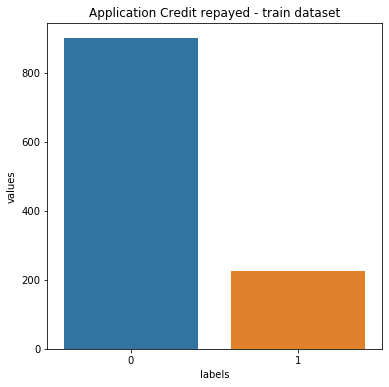

In [17]:
temp = cust_df["label"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application Credit repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [18]:
cust_pymt_df_prd

id  prod_code  new_balance_avg
0     54982353          1            0.000
1     54982353          2            0.000
2     54982353         10        47287.275
3     54982356          6            0.000
4     54982356         10         7972.200
...        ...        ...              ...
3051  59006193         10        16201.800
3052  59006219          5       528427.200
3053  59006219         10         5650.200
3054  59006239          6            0.000
3055  59006239         10         1246.200

[3056 rows x 3 columns]

In [19]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(df,label,var,nrow=2):
    
    i = 0
    t1 = df.loc[df[label] != 0]
    t0 = df.loc[df[label] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="label = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="label = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [20]:
print('Minimum new balance avg in the dataset :- ',cust_pymt_df_prd['new_balance_avg'].min())
print('Maximum new balance avg in the dataset :- ',cust_pymt_df_prd['new_balance_avg'].max())

Minimum new balance avg in the dataset :-  -32662.8
Maximum new balance avg in the dataset :-  163211958.0


/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning:

invalid value encountered in log



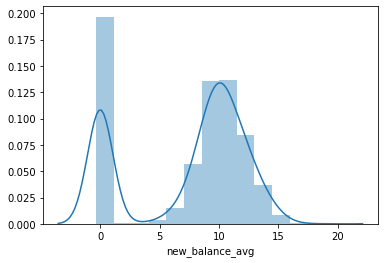

In [21]:
sns.distplot(np.log(cust_pymt_df_prd['new_balance_avg']+1))

In [22]:
# Find correlations with the target and sort
correlations = cust_df.corr()['label'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 fea_4    -1.314593e-01
fea_2    -7.236856e-02
id       -2.461878e-02
fea_8    -2.125122e-02
fea_7    -1.227143e-02
fea_9     1.570103e-16
fea_10    8.808212e-04
fea_11    2.444255e-03
fea_5     1.729286e-02
fea_6     2.890698e-02
fea_1     5.207118e-02
fea_3     5.565787e-02
label     1.000000e+00
Name: label, dtype: float64

Most Negative Correlations:
 fea_4    -1.314593e-01
fea_2    -7.236856e-02
id       -2.461878e-02
fea_8    -2.125122e-02
fea_7    -1.227143e-02
fea_9     1.570103e-16
fea_10    8.808212e-04
fea_11    2.444255e-03
fea_5     1.729286e-02
fea_6     2.890698e-02
fea_1     5.207118e-02
fea_3     5.565787e-02
label     1.000000e+00
Name: label, dtype: float64


### Correlation - Heatmap

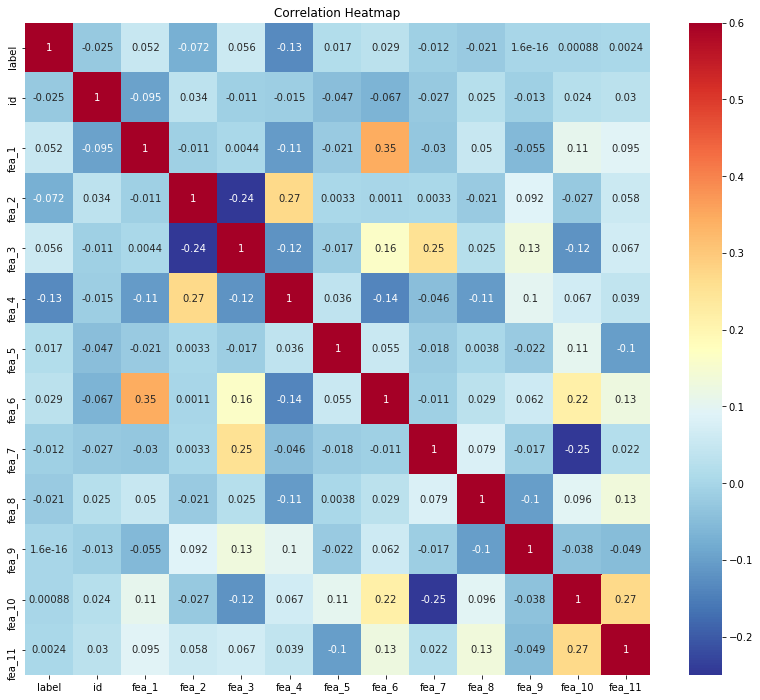

In [23]:
correlations = cust_df.corr()
plt.figure(figsize = (14, 12))
sns.heatmap(correlations,cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

### Checking the Overall Distribution

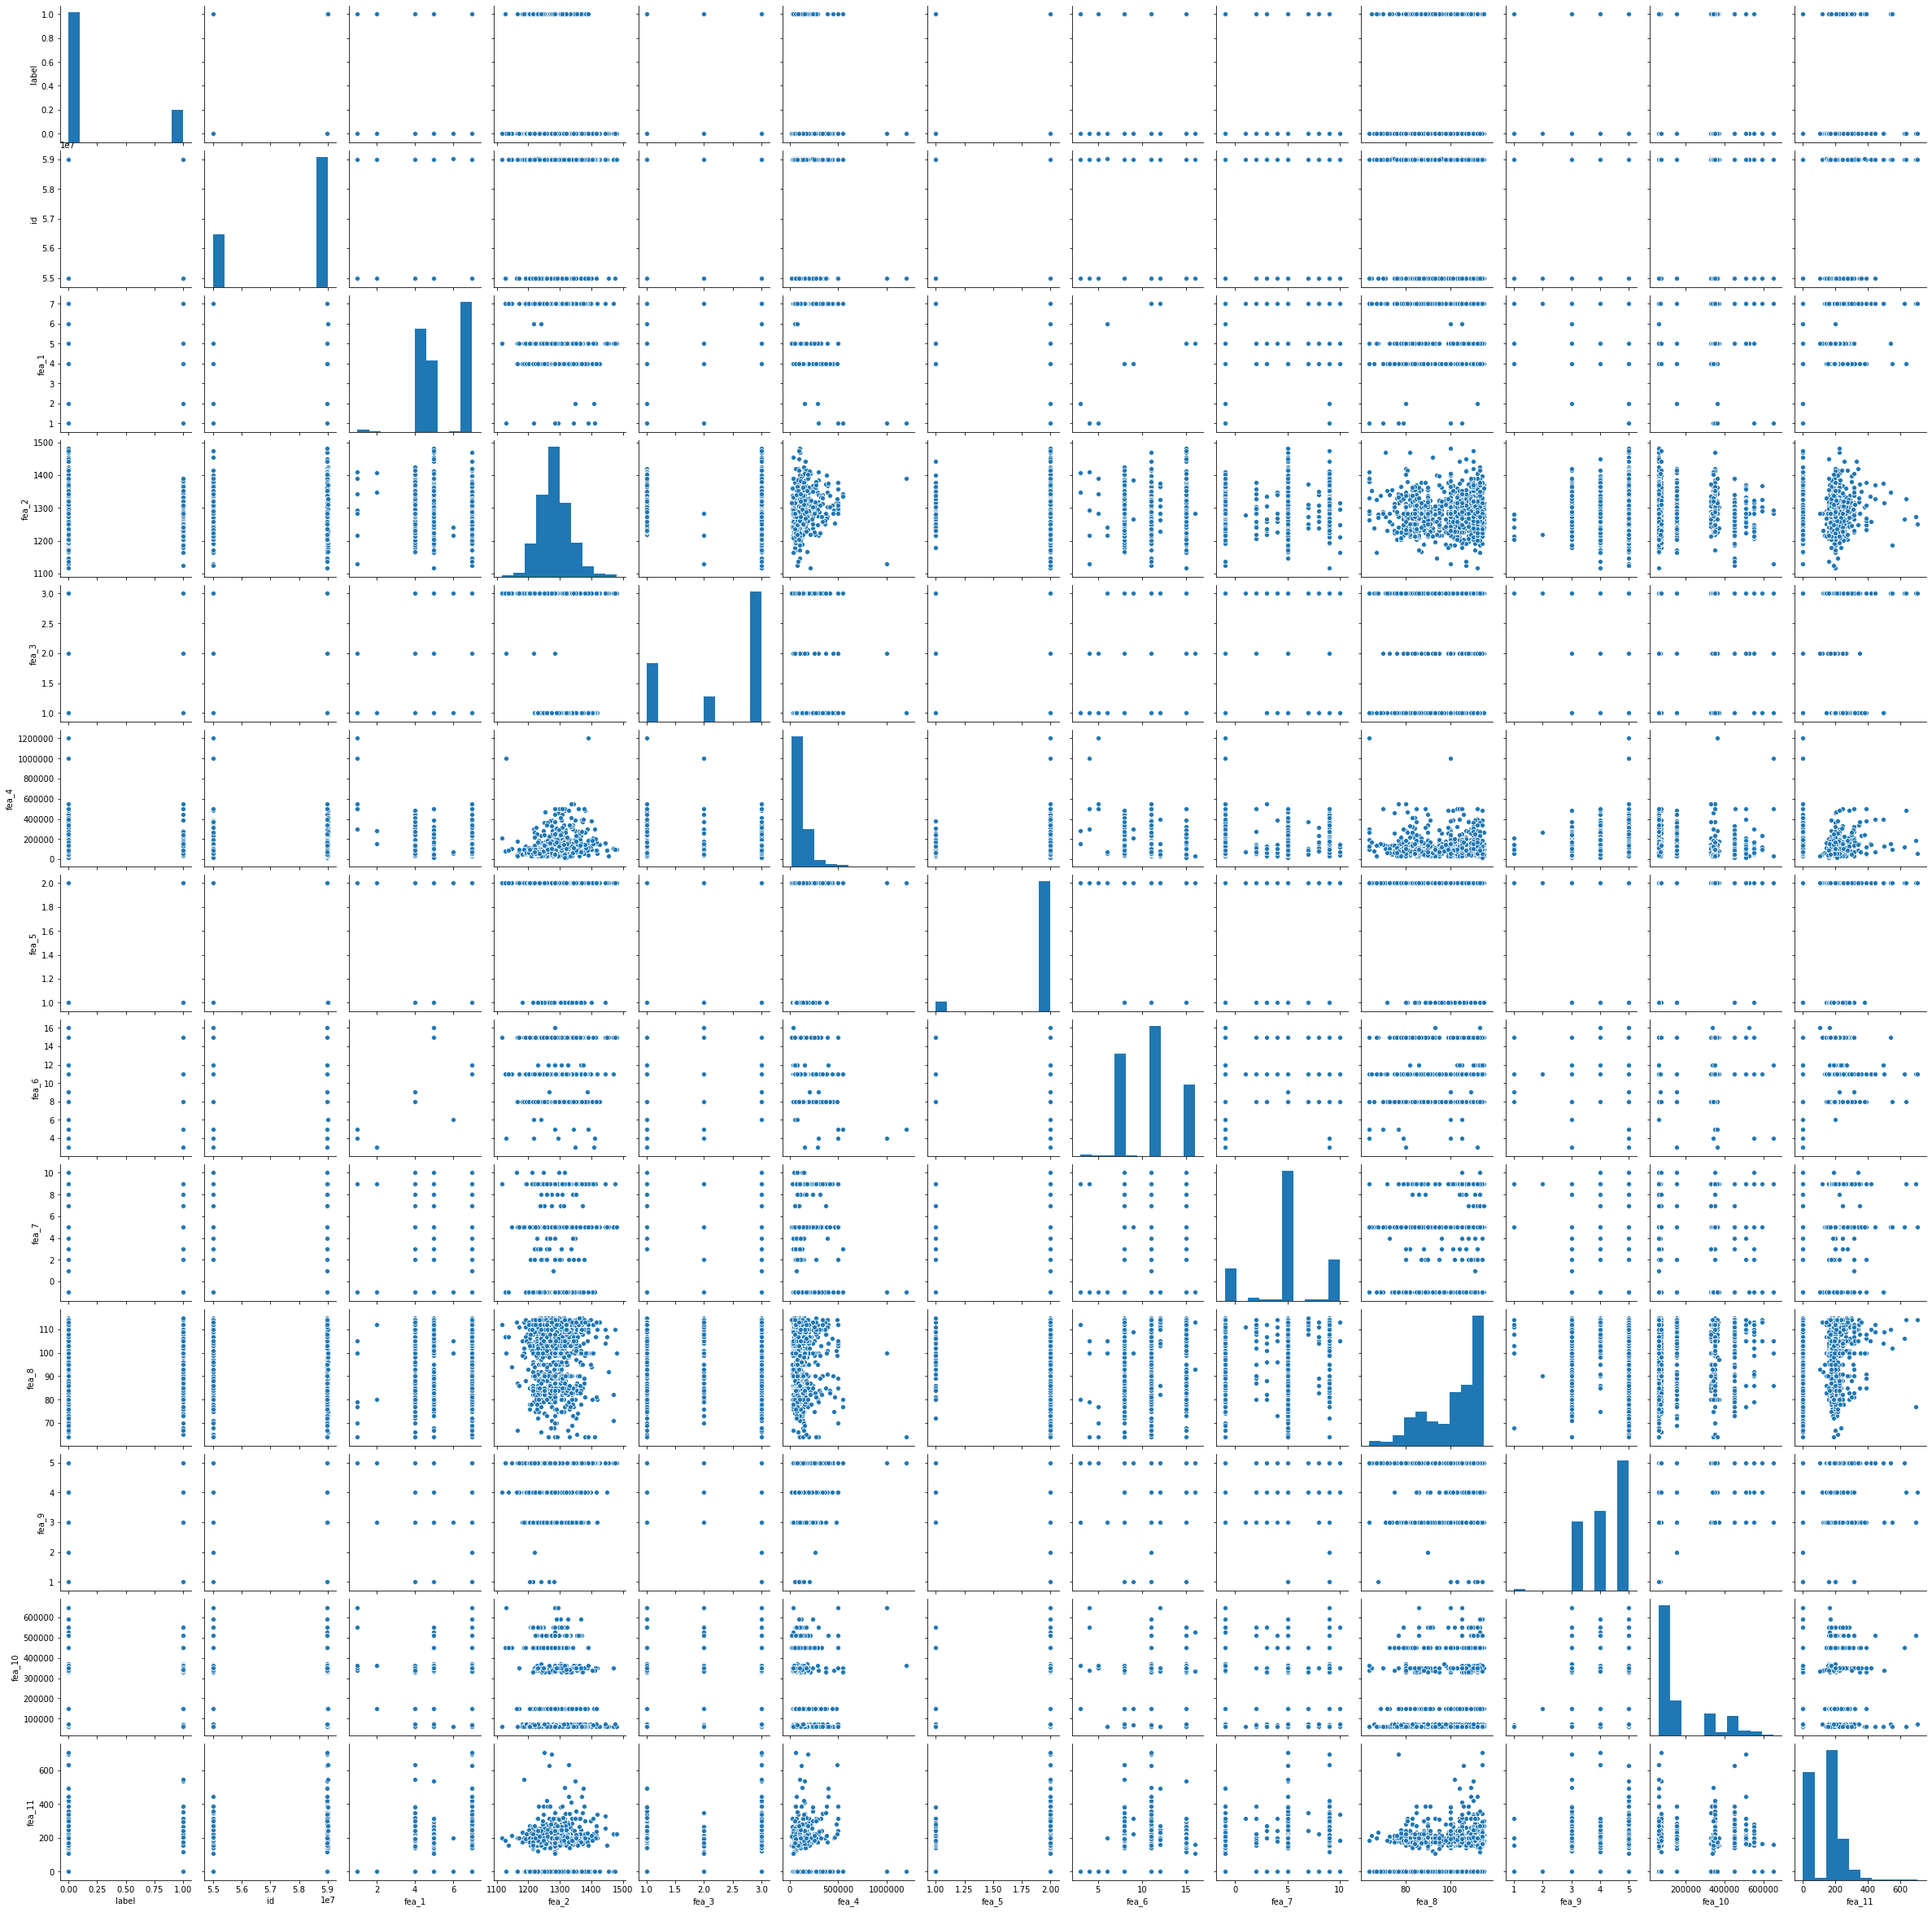

In [24]:
sns.pairplot(cust_df)

In [25]:
cust_df.columns

Index(['label', 'id', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6',
       'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11'],
      dtype='object')

In [26]:
Total_features=['fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6','fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11']

In [27]:
cat_features = ['fea_3','fea_5','fea_6','fea_9']
num_features = ['fea_1','fea_2','fea_4','fea_7','fea_8','fea_10','fea_11']

In [28]:
def standerdisation(df,num_cols):
# copy of datasets
    df_stand = df.copy()

    # apply standardization on numerical features
    for i in num_cols:

        # fit on training data column
        scale = StandardScaler().fit(df_stand[[i]])

        # transform the training data column
        df_stand[i] = scale.transform(df_stand[[i]])
        
    return df_stand

In [29]:
cust_df_std =  standerdisation(cust_df,num_features)

In [30]:
feat_cols=[cols for cols  in cust_df_std.columns if cols not in ['label','id']]

## Preparing data for the model

In [31]:
X_train,X_test,y_train,y_test=train_test_split(cust_df_std[feat_cols],cust_df_std[['label']],test_size=0.15)

In [32]:
X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)
y_train.reset_index(inplace=True)
y_test.reset_index(inplace=True)

X_train.drop(columns=['index'],axis=1,inplace=True)
X_test.drop(columns=['index'],axis=1,inplace=True)
y_train.drop(columns=['index'],axis=1,inplace=True)
y_test.drop(columns=['index'],axis=1,inplace=True)

print('Shape of Train features :-',X_train.shape)
print('Shape of Test features  :-',X_test.shape)

print('Shape of Train Target   :-',y_train.shape)
print('Shape of Test Target    :-',y_test.shape)
y_train = y_train['label'].copy()
y_test = y_test['label'].copy()

Shape of Train features :- (956, 11)
Shape of Test features  :- (169, 11)
Shape of Train Target   :- (956, 1)
Shape of Test Target    :- (169, 1)


# Defining Hyperparameters for Model

In [33]:
params = {'application': 'binary',
          'boosting': 'gbdt',
          'metric': 'auc',
          'max_depth': 16,
          'learning_rate': 0.05,
          'bagging_fraction': 0.9,
          'feature_fraction': 0.9,
          'verbosity': -1,
          'lambda_l1': 0.1,
          'lambda_l2': 0.01,
          'num_leaves': 500,
          'min_child_weight': 3,
          'data_random_seed': 17,
         'nthreads':4}


early_stop = 500
verbose_eval = 30
num_rounds = 600

folds = 5
seed =10
kf = KFold(n_splits = folds, shuffle = True, random_state=seed)
debug =False

# Modeling

In [34]:
y_preds2 = np.zeros(X_test.shape[0])
feature_importance_df = pd.DataFrame()
i = 0
for tr_idx, val_idx in kf.split(X_train, y_train):

    train_X = X_train[feat_cols].iloc[tr_idx]
    val_X = X_train[feat_cols].iloc[val_idx]
    
    train_y = y_train.iloc[tr_idx]
    val_y = y_train.iloc[val_idx]
    
    lgb_train = lgb.Dataset(train_X, train_y, categorical_feature=cat_features)
    lgb_eval = lgb.Dataset(val_X, val_y, categorical_feature=cat_features)
    
    model = lgb.train(params,
                      train_set=lgb_train,
                      num_boost_round=num_rounds,
                      valid_sets=(lgb_train, lgb_eval),
                      verbose_eval=100)
        
    
    y_preds2+= model.predict(X_test) / folds
    
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = train_X.columns
    fold_importance_df["importance"] = model.feature_importance()
    fold_importance_df["fold"] = i + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    if debug:    
        print("debug:",roc_auc_score(y_test, model.predict(X_test) / folds))  
    i+=1
    del train_X,lgb_train

[100]	training's auc: 0.996264	valid_1's auc: 0.612664


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1291: UserWarning:

Using categorical_feature in Dataset.



[200]	training's auc: 0.999669	valid_1's auc: 0.618155
[300]	training's auc: 0.999969	valid_1's auc: 0.631239
[400]	training's auc: 1	valid_1's auc: 0.624778
[500]	training's auc: 1	valid_1's auc: 0.625586
[600]	training's auc: 1	valid_1's auc: 0.624455
[100]	training's auc: 0.995862	valid_1's auc: 0.628827
[200]	training's auc: 0.999949	valid_1's auc: 0.635879
[300]	training's auc: 1	valid_1's auc: 0.642243
[400]	training's auc: 1	valid_1's auc: 0.640695
[500]	training's auc: 1	valid_1's auc: 0.634159
[600]	training's auc: 1	valid_1's auc: 0.626591
[100]	training's auc: 0.996388	valid_1's auc: 0.677533
[200]	training's auc: 0.999969	valid_1's auc: 0.661074
[300]	training's auc: 1	valid_1's auc: 0.660275
[400]	training's auc: 1	valid_1's auc: 0.653404
[500]	training's auc: 1	valid_1's auc: 0.654682
[600]	training's auc: 1	valid_1's auc: 0.648929
[100]	training's auc: 0.993796	valid_1's auc: 0.505657
[200]	training's auc: 0.999948	valid_1's auc: 0.5022
[300]	training's auc: 1	valid_1's 

# Feature Importance

Index(['fea_4', 'fea_2', 'fea_10', 'fea_8', 'fea_11', 'fea_9', 'fea_3',
       'fea_1', 'fea_7', 'fea_6', 'fea_5'],
      dtype='object', name='Feature')


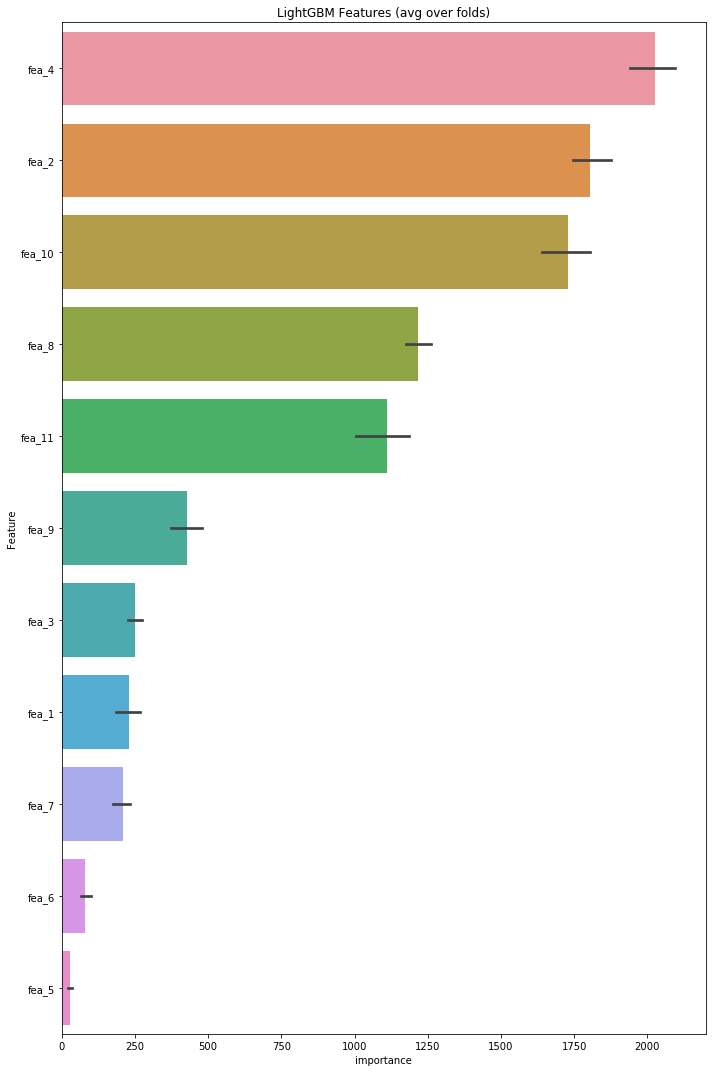

In [35]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:100].index)
print(cols)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(10,15))
sns.barplot(x="importance",
            y="Feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

### Persona Level understanding

In [36]:
cust_df[cust_df['id']==54982665]

label        id  fea_1   fea_2  fea_3    fea_4  fea_5  fea_6  fea_7  fea_8  \
0      1  54982665      5  1245.5      3  77000.0      2     15      5    109   

   fea_9  fea_10      fea_11  
0      5  151300  244.948974

In [37]:
cust_pymt_df[cust_pymt_df['id']==54982665]

id  OVD_t1  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  \
2035  54982665       0       0       0        0           9         10   
6056  54982665       0       0       0        0          18         10   
6101  54982665       0       0       0        0           1          5   
7161  54982665       0       2      26    11906           6         10   

      prod_limit update_date  new_balance  highest_balance report_date  
2035     60500.0  31/01/2015       6657.6          18934.0  19/09/2015  
6056         NaN  28/04/2009     153792.0         149387.0  10/08/2015  
6101         NaN  30/03/2009          0.0         150500.0         NaN  
7161         NaN  17/05/2007          0.0          46371.0  12/07/2013

In [38]:
test = cust_pymt_df[cust_pymt_df['id']==54982665]

In [39]:
test.groupby(['id','prod_code'])\
.agg({'new_balance':'mean','highest_balance':'mean','OVD_t1':'sum','OVD_t2':'sum','OVD_t3':'sum','OVD_sum':'sum','pay_normal':'mean','prod_limit':'max'})\
.reset_index()

id  prod_code  new_balance  highest_balance  OVD_t1  OVD_t2  OVD_t3  \
0  54982665          5          0.0         150500.0       0       0       0   
1  54982665         10      53483.2          71564.0       0       2      26   

   OVD_sum  pay_normal  prod_limit  
0        0           1         NaN  
1    11906          11     60500.0

In [40]:
cust_pymt_df_smmry = cust_pymt_df.groupby(['id','prod_code'])\
.agg({'new_balance':'mean','highest_balance':'mean','OVD_t1':'sum','OVD_t2':'sum','OVD_t3':'sum','OVD_sum':'sum','pay_normal':'mean'})\
.reset_index()

In [41]:
cust_pymt_df_smmry

id  prod_code  new_balance  highest_balance  OVD_t1  OVD_t2  \
0     54982353          1        0.000    700500.000000       0       0   
1     54982353          2        0.000    248874.000000       0       0   
2     54982353         10    47287.275    156424.875000       3       2   
3     54982356          6        0.000     17000.000000       0       0   
4     54982356         10     7972.200     54939.500000       0       0   
...        ...        ...          ...              ...     ...     ...   
3051  59006193         10    16201.800     53104.833333       0       0   
3052  59006219          5   528427.200    500500.000000       0       0   
3053  59006219         10     5650.200     33623.000000       1       0   
3054  59006239          6        0.000     21000.000000       0       0   
3055  59006239         10     1246.200     14670.500000       0       0   

      OVD_t3  OVD_sum  pay_normal  
0          0        0      1.0000  
1          0        0     11.0000  
2         38    32078     13.5625  
3          0        0      5.0000  
4          0        0     36.0000  
...      ...      ...         ...  
3051       0        0     16.5000  
3052       0        0     10.0000  
3053       0       28     35.5000  
3054       0        0      1.0000  
3055       0        0     15.5000  

[3056 rows x 9 columns]

In [42]:
cust_pymt_df_smmry_out = pd.get_dummies(cust_pymt_df_smmry, columns=["prod_code"])

In [43]:
cust_pymt_df_smmry.columns

['new_balance', 'highest_balance', 'OVD_t1', 'OVD_t2','OVD_t3', 'OVD_sum', 'pay_normal']

['new_balance',
 'highest_balance',
 'OVD_t1',
 'OVD_t2',
 'OVD_t3',
 'OVD_sum',
 'pay_normal']

In [44]:
cust_df.shape

(1125, 13)

In [45]:
cust_pymt_df_smmry['credit_positive']=0
cust_pymt_df_smmry.loc[cust_pymt_df_smmry['new_balance'] >= 0,'credit_positive']=1
cust_pymt_df_smmry['new_balance'] = abs(cust_pymt_df_smmry['new_balance'])
cust_pymt_df_smmry['new_balance_mean'] = abs(cust_pymt_df_smmry['new_balance'] - cust_pymt_df_smmry['new_balance'].mean())
cust_pymt_df_smmry['new_balance_min_std'] = cust_pymt_df_smmry['new_balance_mean'] / cust_pymt_df_smmry['new_balance'].std()

In [46]:
cust_pymt_df_smmry

id  prod_code  new_balance  highest_balance  OVD_t1  OVD_t2  \
0     54982353          1        0.000    700500.000000       0       0   
1     54982353          2        0.000    248874.000000       0       0   
2     54982353         10    47287.275    156424.875000       3       2   
3     54982356          6        0.000     17000.000000       0       0   
4     54982356         10     7972.200     54939.500000       0       0   
...        ...        ...          ...              ...     ...     ...   
3051  59006193         10    16201.800     53104.833333       0       0   
3052  59006219          5   528427.200    500500.000000       0       0   
3053  59006219         10     5650.200     33623.000000       1       0   
3054  59006239          6        0.000     21000.000000       0       0   
3055  59006239         10     1246.200     14670.500000       0       0   

      OVD_t3  OVD_sum  pay_normal  credit_positive  new_balance_mean  \
0          0        0      1.0000                1     195759.788003   
1          0        0     11.0000                1     195759.788003   
2         38    32078     13.5625                1     148472.513003   
3          0        0      5.0000                1     195759.788003   
4          0        0     36.0000                1     187787.588003   
...      ...      ...         ...              ...               ...   
3051       0        0     16.5000                1     179557.988003   
3052       0        0     10.0000                1     332667.411997   
3053       0       28     35.5000                1     190109.588003   
3054       0        0      1.0000                1     195759.788003   
3055       0        0     15.5000                1     194513.588003   

      new_balance_min_std  
0                0.064768  
1                0.064768  
2                0.049123  
3                0.064768  
4                0.062131  
...                   ...  
3051             0.059408  
3052             0.110065  
3053             0.062899  
3054             0.064768  
3055             0.064356  

[3056 rows x 12 columns]

In [47]:
cust_pymt_df_smmry['new_balance_log']=np.log(cust_pymt_df_smmry['new_balance']+1)
cust_pymt_df_smmry['new_balance_min_std_log']=np.log(cust_pymt_df_smmry['new_balance_min_std']+1)
cust_pymt_df_smmry['new_balance_mean_log']=np.log(cust_pymt_df_smmry['new_balance_mean']+1)

In [48]:
cust_pymt_df_smmry.pivot(index='id', columns='prod_code', values=['new_balance_log', 'highest_balance', 'OVD_t1', 'OVD_t2','OVD_t3', 'OVD_sum', 'pay_normal','new_balance_min_std_log','new_balance_mean_log']).reset_index().fillna(0)

id new_balance_log                                       \
prod_code                         0          1    2    3    4          5   
0          54982353        0.000000   0.000000  0.0  0.0  0.0   0.000000   
1          54982356        0.000000   0.000000  0.0  0.0  0.0   0.000000   
2          54982387        0.000000  12.953996  0.0  0.0  0.0   0.000000   
3          54982463        0.000000   0.000000  0.0  0.0  0.0  11.287051   
4          54982530        0.000000   0.000000  0.0  0.0  0.0   0.000000   
...             ...             ...        ...  ...  ...  ...        ...   
1120       59005995        0.000000   0.000000  0.0  0.0  0.0   0.000000   
1121       59006139        9.448175   9.058703  0.0  0.0  0.0   0.000000   
1122       59006193        0.000000   0.000000  0.0  0.0  0.0   0.000000   
1123       59006219        0.000000   0.000000  0.0  0.0  0.0  13.177662   
1124       59006239        0.000000   0.000000  0.0  0.0  0.0   0.000000   

                               ... new_balance_mean_log                       \
prod_code         6    7    8  ...                   12         13   15   17   
0          0.000000  0.0  0.0  ...             0.000000   0.000000  0.0  0.0   
1          0.000000  0.0  0.0  ...            12.184649   0.000000  0.0  0.0   
2          0.000000  0.0  0.0  ...             0.000000   0.000000  0.0  0.0   
3          0.000000  0.0  0.0  ...             0.000000  12.184649  0.0  0.0   
4          0.000000  0.0  0.0  ...             0.000000   0.000000  0.0  0.0   
...             ...  ...  ...  ...                  ...        ...  ...  ...   
1120       0.000000  0.0  0.0  ...             0.000000   0.000000  0.0  0.0   
1121       0.000000  0.0  0.0  ...             0.000000   0.000000  0.0  0.0   
1122       8.699681  0.0  0.0  ...             0.000000   0.000000  0.0  0.0   
1123       0.000000  0.0  0.0  ...             0.000000   0.000000  0.0  0.0   
1124       0.000000  0.0  0.0  ...             0.000000   0.000000  0.0  0.0   

                                                     
prod_code   19   22         24   25   26         27  
0          0.0  0.0   0.000000  0.0  0.0   0.000000  
1          0.0  0.0   0.000000  0.0  0.0  12.184649  
2          0.0  0.0   0.000000  0.0  0.0   0.000000  
3          0.0  0.0   0.000000  0.0  0.0   0.000000  
4          0.0  0.0   0.000000  0.0  0.0   0.000000  
...        ...  ...        ...  ...  ...        ...  
1120       0.0  0.0  11.317407  0.0  0.0   0.000000  
1121       0.0  0.0   0.000000  0.0  0.0   0.000000  
1122       0.0  0.0   0.000000  0.0  0.0   0.000000  
1123       0.0  0.0   0.000000  0.0  0.0   0.000000  
1124       0.0  0.0   0.000000  0.0  0.0   0.000000  

[1125 rows x 190 columns]

In [49]:
'''
In this dataset, each customer is classified as high or low credit risk according to the set of features and payment history. If label is 1, the customer is in high credit risk. Dataset imbalance ratio is 20%.

Data:
payment_data.csv: customer’s card payment history.
	id: customer id
	OVD_t1: number of times overdue type 1
	OVD_t2: number of times overdue type 2
	OVD_t3: number of times overdue type 3
	OVD_sum: total overdue days
	pay_normal: number of times normal payment
	prod_code: credit product code
	prod_limit: credit limit of product
	update_date: account update date
	new_balance: current balance of product
	highest_balance: highest balance in history
	report_date: date of recent payment
customer_data.csv: 

       customer’s demographic data and category attributes which have been encoded. Category features are fea_1, fea_3, fea_5, fea_6, fea_7, fea_9.
       label is 1, the customer is in high credit risk
       label is 0, the customer is in low credit risk

Tasks:
•	Explore data to give insights.
•	Build features from existing payment data.
•	Build model to predict high risk customer 
•	Model explanation and evaluation



       customer’s demographic data and category attributes which have been encoded. 
       Category features are fea_1, fea_3, fea_5, fea_6, fea_7, fea_9.
       label is 1, the customer is in high credit risk
       label is 0, the customer is in low credit risk
'''

'\nIn this dataset, each customer is classified as high or low credit risk according to the set of features and payment history. If label is 1, the customer is in high credit risk. Dataset imbalance ratio is 20%.\n\nData:\npayment_data.csv: customer’s card payment history.\n\tid: customer id\n\tOVD_t1: number of times overdue type 1\n\tOVD_t2: number of times overdue type 2\n\tOVD_t3: number of times overdue type 3\n\tOVD_sum: total overdue days\n\tpay_normal: number of times normal payment\n\tprod_code: credit product code\n\tprod_limit: credit limit of product\n\tupdate_date: account update date\n\tnew_balance: current balance of product\n\thighest_balance: highest balance in history\n\treport_date: date of recent payment\ncustomer_data.csv: \n\n       customer’s demographic data and category attributes which have been encoded. Category features are fea_1, fea_3, fea_5, fea_6, fea_7, fea_9.\n       label is 1, the customer is in high credit risk\n       label is 0, the customer is in

In [50]:
cust_prd = cust_pymt_df[['id','prod_code']].drop_duplicates(keep='first')

In [51]:
cust_prd['id'].value_counts()

58987276    9
58987886    8
58993081    8
58999208    8
54991742    8
           ..
54983694    1
58983048    1
54992131    1
59003524    1
54984789    1
Name: id, Length: 1125, dtype: int64

## <a id='5-1'>5.1 Distribution of new_balance</a>

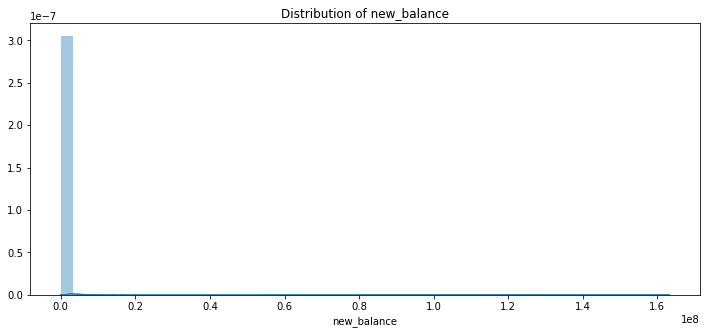

In [52]:
plt.figure(figsize=(12,5))
plt.title("Distribution of new_balance")
ax = sns.distplot(cust_pymt_df["new_balance"])

# ...In Progress